# Potential Fish Zone Identification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
np.random.seed(40)

: 

In [7]:
'''
Sea Surface Temperature, Chlorophyll, 
Relative Humidity, Sea Level Pressure, Air Temperature, Total Cloudiness and Total Fish catch data.

'''

'\nSea Surface Temperature, Chlorophyll, \nRelative Humidity, Sea Level Pressure, Air Temperature, Total Cloudiness and Total Fish catch data.\n\n'

# Remove year and Month and Label

In [8]:
df =  td[['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC', 'TOTALOIL']]
df

,SST,SSC,AT,RH,SLP,TC,TOTALOIL
0,28.659535,0.24,27.927021,76.067391,1013.386250,3.438298,48131.725
1,28.506889,0.19,28.140408,74.979592,1012.342449,2.791837,20158.942
2,29.359070,0.18,28.922500,76.359574,1012.280417,3.511111,33400.703
3,30.385854,0.26,29.801250,78.610417,1009.744792,4.110638,7268.411
4,30.749362,0.24,30.292000,77.500000,1008.289600,4.424000,16186.259
...,...,...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Shuffle the dataset and apply interpolate method

In [9]:
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
nedf = df.interpolate(method='cubic', axis=0).ffill().bfill()

ImportError: Missing optional dependency 'scipy'. cubic interpolation requires SciPy. Use pip or conda to install scipy.

In [ ]:
nedf = nedf.astype("float")
nedf

,SST,SSC,AT,RH,SLP,TC,TOTALOIL
0,29.356190,0.160000,29.117391,77.686667,1009.645435,3.717778,14151.874000
1,29.036667,0.180000,28.596875,81.393617,1007.970417,5.682979,10643.353000
2,28.392000,0.120000,27.458889,74.524444,1009.368636,3.581395,71906.825000
3,28.264561,0.153436,27.206719,72.660818,1011.681495,2.748212,83904.077423
4,28.373095,0.230000,27.545814,74.965854,1013.454318,3.148780,60903.643000
...,...,...,...,...,...,...,...
86,28.832381,0.183171,27.711862,70.788094,1014.585875,1.374129,79499.586720
87,29.088229,0.209585,27.899966,71.835525,1014.541974,1.995630,74813.592810
88,28.749800,0.220000,27.759000,75.864000,1012.828200,3.472000,52246.149000
89,27.470444,0.190000,27.063043,83.360870,1009.054681,5.747826,6259.526000


# Create label

In [ ]:
ssc = np.array(nedf['SSC'])
sst = np.array(nedf['SST'])
fc = np.array(nedf['TOTALOIL'])

In [ ]:
lab = []
for i in range(len(ssc)):
    if ssc[i]>0.2 and sst[i]>25.0 and fc[i]>10000:
        lab.append("PFZ")
    else:
        lab.append("NPFZ")

In [ ]:
label = pd.DataFrame(lab,columns=['label'])

In [ ]:
dataset = pd.concat([nedf,label],axis=1)
dataset

,SST,SSC,AT,RH,SLP,TC,TOTALOIL,label
0,29.356190,0.160000,29.117391,77.686667,1009.645435,3.717778,14151.874000,NPFZ
1,29.036667,0.180000,28.596875,81.393617,1007.970417,5.682979,10643.353000,NPFZ
2,28.392000,0.120000,27.458889,74.524444,1009.368636,3.581395,71906.825000,NPFZ
3,28.264561,0.153436,27.206719,72.660818,1011.681495,2.748212,83904.077423,NPFZ
4,28.373095,0.230000,27.545814,74.965854,1013.454318,3.148780,60903.643000,PFZ
...,...,...,...,...,...,...,...,...
86,28.832381,0.183171,27.711862,70.788094,1014.585875,1.374129,79499.586720,NPFZ
87,29.088229,0.209585,27.899966,71.835525,1014.541974,1.995630,74813.592810,PFZ
88,28.749800,0.220000,27.759000,75.864000,1012.828200,3.472000,52246.149000,PFZ
89,27.470444,0.190000,27.063043,83.360870,1009.054681,5.747826,6259.526000,NPFZ


In [ ]:
dataset.to_csv("cubic_interpolation.csv",sep='\t', encoding='utf-8')

In [ ]:
# create a copy
df1 = dataset

In [ ]:
# mapping
df1['label']=df1['label'].map({'PFZ':0,'NPFZ':1})

# Drop Total catch

In [ ]:
df2=df1.drop(['TOTALOIL'],axis=1)
df2.columns

Index(['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC', 'label'], dtype='object')

# Split data and label

In [ ]:
X = df2[['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC']]
Y = df2[['label']]

# normalized the data and label

In [ ]:
from sklearn import preprocessing

In [ ]:
X_norm = preprocessing.normalize(X, norm='l2')

In [ ]:
y = np.squeeze(np.array(Y).reshape(1,-1))

# Feature importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier()
model.fit(X_norm,y)
feature_importance=model.feature_importances_
print(model.feature_importances_)

[0.1648513  0.50519271 0.10192441 0.08046873 0.07817693 0.06938593]


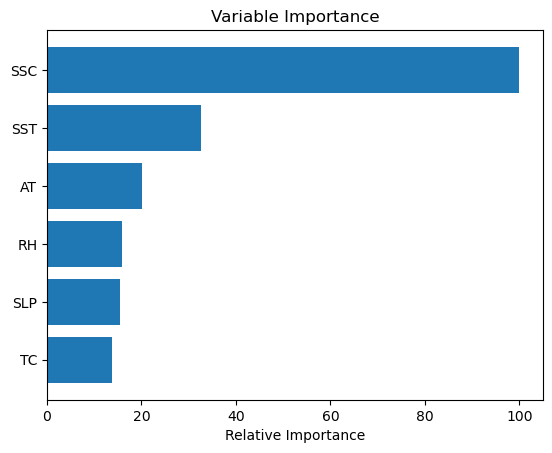

In [ ]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .8
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# apply machine learning

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.33, random_state=40)

# SVM

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC() # svm classifer

In [ ]:
clf.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_recall_curve

In [ ]:
result1 = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test,result1)

array([[ 0,  9],
       [ 0, 22]], dtype=int64)

In [ ]:
print(accuracy_score(result1,y_test))

0.7096774193548387


# Boosted Tree

In [ ]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
model_xgboost = xgb.XGBClassifier() # boosted tree classifire
model_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
predXGB = model_xgboost.predict(X_test)
print(accuracy_score(predXGB,y_test))

0.9032258064516129


In [ ]:
confusion_matrix(y_test,predXGB)

array([[10,  2],
       [ 1, 18]], dtype=int64)

In [ ]:
test_set = pd.DataFrame(X_test,columns=['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC'])
prediction = pd.DataFrame(predXGB,columns=['label'])
prediction['label'] = prediction['label'].map({0:'NPFZ',1:'PFZ'})
output = pd.concat([test_set,prediction],axis=1)
output.to_csv("output.csv",sep='\t', encoding='utf-8')

# Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
clfD = tree.DecisionTreeClassifier()

In [ ]:
clfD.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
result2 = clfD.predict(X_test)

In [ ]:
accuracy_score(y_test,result2)

1.0

In [ ]:
confusion_matrix(y_test,result2)

array([[ 9,  0],
       [ 0, 22]], dtype=int64)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print(accuracy_score(pred,y_test))

0.9354838709677419


In [ ]:
confusion_matrix(y_test,pred)

array([[ 9,  0],
       [ 2, 20]], dtype=int64)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(X_train, y_train)
predRF = clfRF.predict(X_test)

In [ ]:
print(accuracy_score(predRF,y_test))

1.0


In [ ]:
confusion_matrix(y_test,predRF)

array([[ 9,  0],
       [ 0, 22]], dtype=int64)